# **Handling Categorical Features**

*Categorical encoding is a process of converting categories to numbers.*

In [36]:
# Import Library.
import pandas as pd
import numpy as np

In [37]:
# Import Dataset.
data = pd.read_csv("Startups_Expense.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
data.info() # Data Summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [39]:
data['State'].value_counts()  # Count frequency of each category.

California    17
New York      17
Florida       16
Name: State, dtype: int64

# **Label Encoding**

[sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

***Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned to a unique integer based on alphabetical ordering.***

**Challenges with Label Encoding:**

In this encoding technique, the categorical variables do not have an order or rank. Hence, there is a very high probability that the model captures the relationship between countries such as **New York < Florida < California**. To overcome this obstacle, we use **One-Hot Encoding** technique.

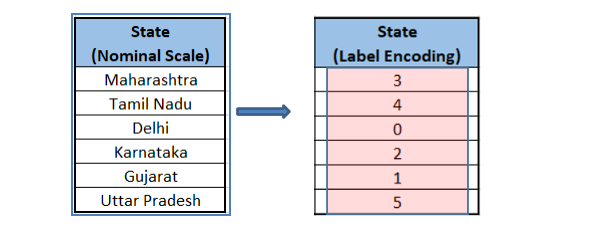

***Label encoding assigns each unique value to a different integer.***

In [40]:
# Label Encoding.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State']) 
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# **One-Hot Encoding**

[sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

***One-Hot Encoding is the process of creating dummy variables.***

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

**Challenges of One-Hot Encoding: Dummy Variable Trap**

*Dummy Variable Trap is a scenario in which variables are highly correlated to each other.*

One-Hot Encoding results in a Dummy Variable Trap since the outcome of one variable can easily be predicted with the help of the remaining variables. The Dummy Variable Trap leads to the problem known as **multicollinearity**. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression. So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.

Another problem with the One-Hot Encoding technique is that it makes the feature space large by adding additional features into the dataset. Hence it becomes computationally expensive and might face the problem of the curse of dimensionality.

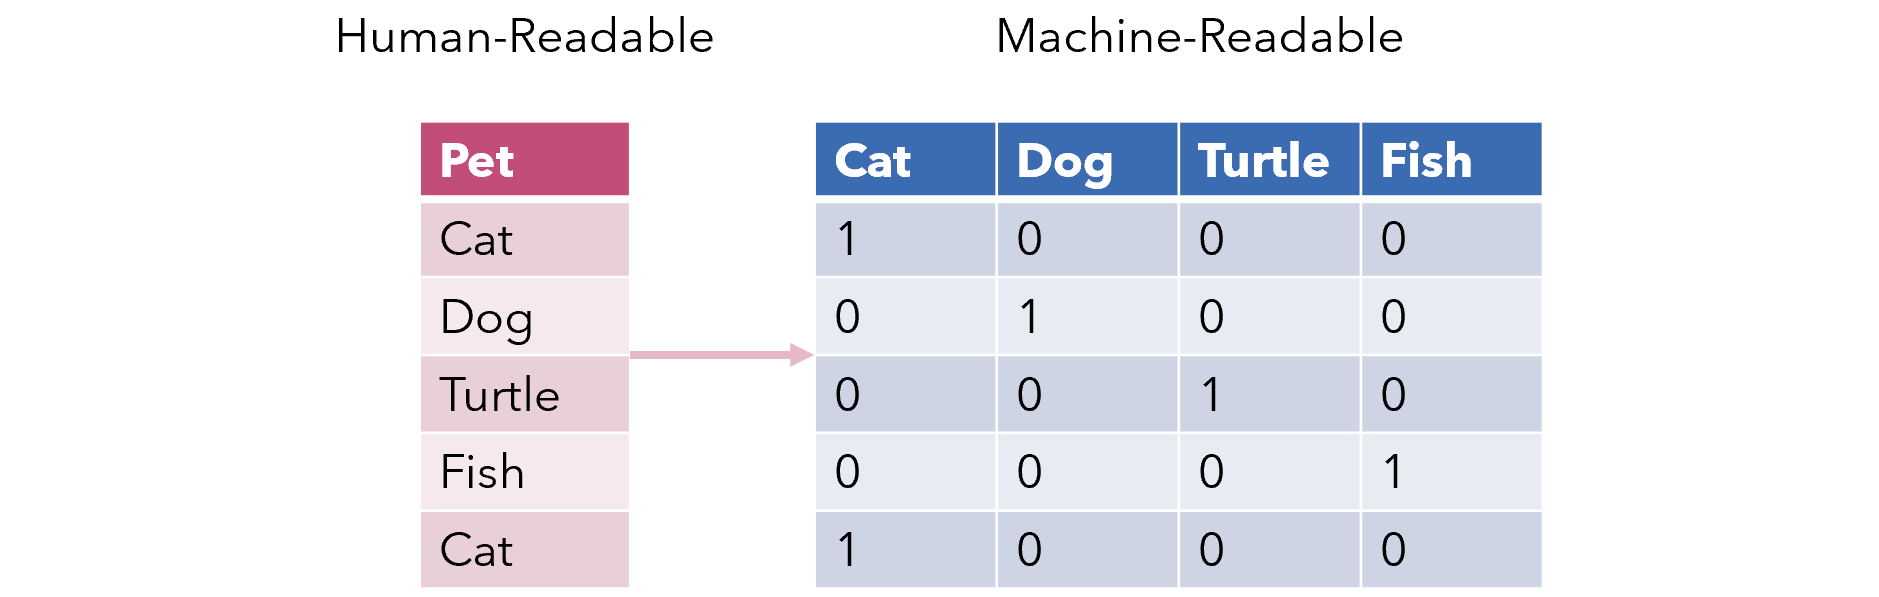

In [41]:
# One-Hot Encoding.
X = data.iloc[:, :].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
data = pd.DataFrame(X, columns = ['California', 'Florida', 'New York', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit'])
data.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


# **When to use a Label Encoding vs. One Hot Encoding?**
This question generally depends on the dataset and the model which we wish to apply. But still, a few points to note before choosing the right encoding technique for our model:

**Apply One-Hot Encoding when:**
*   The categorical feature is not ordinal (eg. India, USA, UK, France, etc.)
*   The number of categorical features is less, so one-hot encoding can be effectively applied.

**Apply Label Encoding when:**
*   The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary School, High School, etc.)
*   The number of categories is quite large as one-hot encoding can lead to high memory consumption.

